In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
loan = pd.read_csv('C:/Users/v-ymudgil/Downloads/loan.csv', low_memory = False)

In [8]:
loan.shape

(39717, 111)

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [10]:
null_cols = loan.columns[loan.isnull().any()]
null_df = loan[null_cols].isnull().sum().to_frame(name='Null Count')\
          .merge(loan[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_df_sorted)

                            Null Count  Null Percent
bc_open_to_buy                   39717    100.000000
acc_open_past_24mths             39717    100.000000
bc_util                          39717    100.000000
mo_sin_old_il_acct               39717    100.000000
mo_sin_old_rev_tl_op             39717    100.000000
...                                ...           ...
collections_12_mths_ex_med          56      0.140998
revol_util                          50      0.125891
tax_liens                           39      0.098195
title                               11      0.027696
last_credit_pull_d                   2      0.005036

[68 rows x 2 columns]


In [11]:
loan[loan.duplicated()].shape[0]

0

In [12]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [17]:
missing_values = loan.isnull().sum()
percentages = (missing_values/len(loan))*100
data = pd.DataFrame({'Missing count': missing_values, 'Percentages' : percentages })
print(data)

                            Missing count  Percentages
id                                      0     0.000000
member_id                               0     0.000000
loan_amnt                               0     0.000000
funded_amnt                             0     0.000000
funded_amnt_inv                         0     0.000000
...                                   ...          ...
tax_liens                              39     0.098195
tot_hi_cred_lim                     39717   100.000000
total_bal_ex_mort                   39717   100.000000
total_bc_limit                      39717   100.000000
total_il_high_credit_limit          39717   100.000000

[111 rows x 2 columns]


In [19]:
used_columns = data[data.Percentages<1]

In [20]:
used_columns

,Missing count,Percentages
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


In [24]:
unused = data[data.Percentages==100]

In [30]:
loan1 = loan.drop(columns = unused.index)

In [31]:
loan1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [34]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [36]:
miss = loan1.isnull().sum()
per = (miss/len(loan1))*100
analysis = pd.DataFrame({'Missing values': miss , 'Percentages' : per })
analysis

,Missing values,Percentages
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


funded_amnt    Axes(0.125,0.11;0.775x0.77)
dtype: object

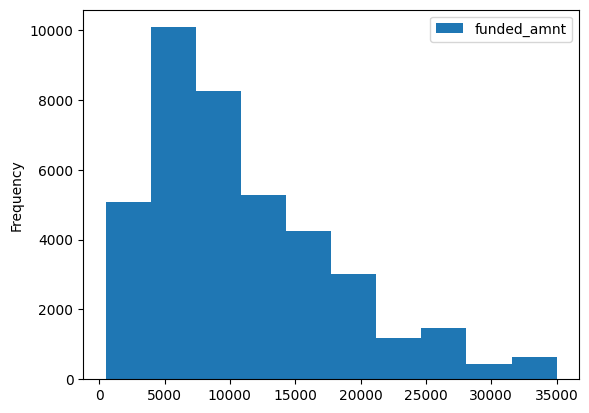

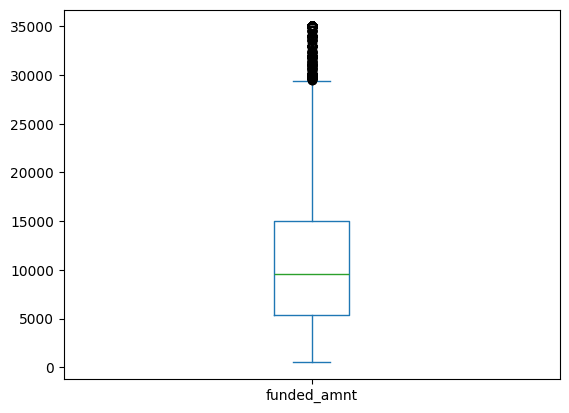

In [93]:
loan1[['funded_amnt']].plot(kind = "hist" , subplots = True)
loan1[['funded_amnt']].plot(kind = "box" , subplots = True)


int_rate    Axes(0.125,0.11;0.775x0.77)
dtype: object

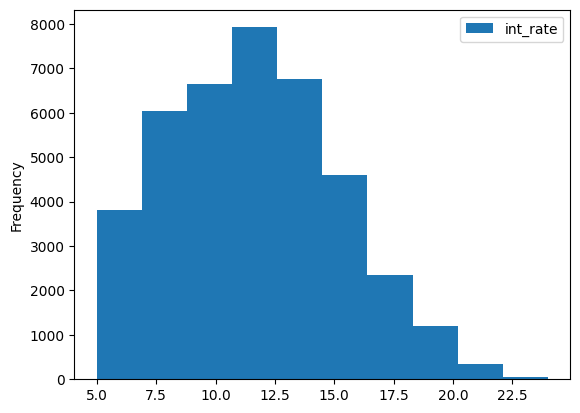

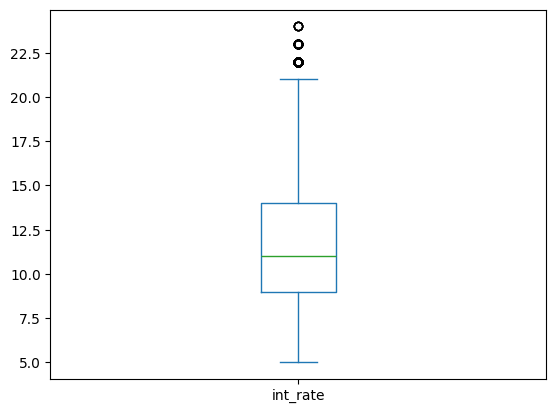

In [54]:
loan1['int_rate'] = loan1['int_rate'].astype(str).apply(lambda x: x[:-1])
loan1['int_rate'] = loan1['int_rate'].astype(float)
loan1[['int_rate']].plot(kind = "hist" , subplots = True)
loan1[['int_rate']].plot(kind = "box" , subplots = True)

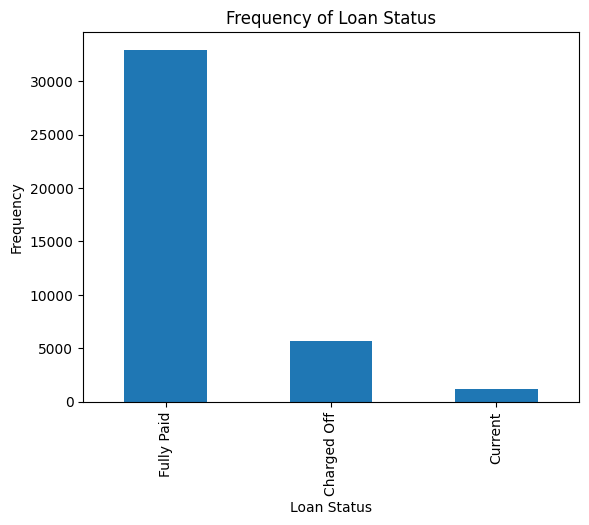

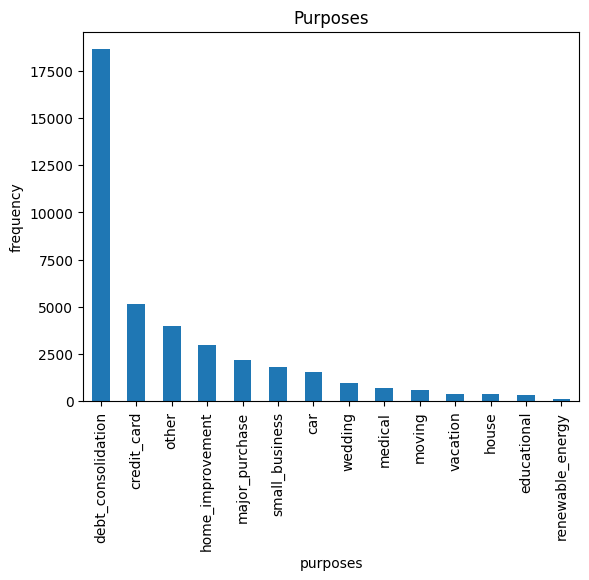

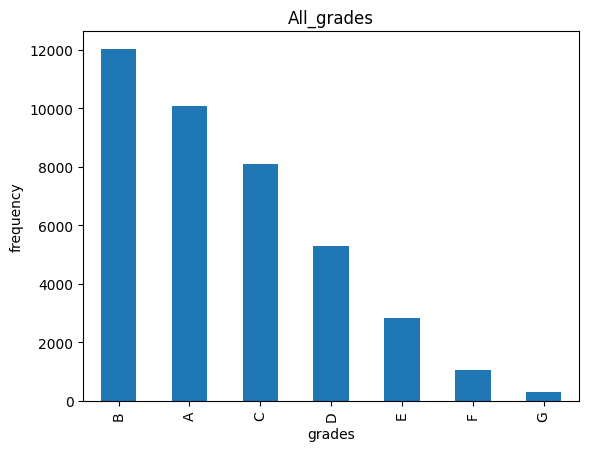

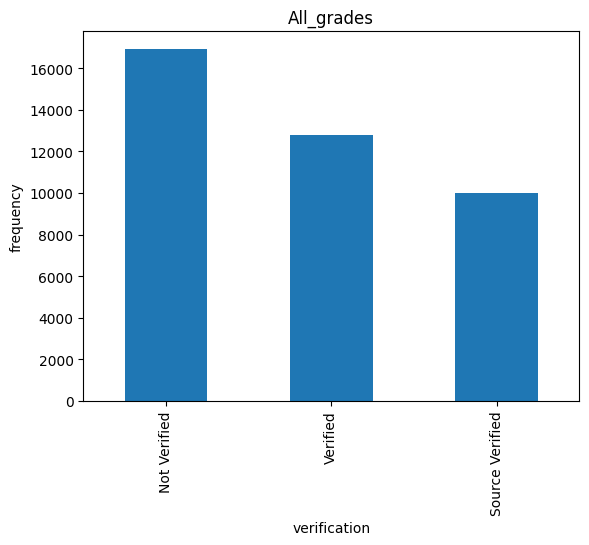

In [61]:
status_counts = loan1['loan_status'].value_counts()
purpose_counts = loan1['purpose'].value_counts()
grade_counts = loan1['grade'].value_counts()
dti_counts = loan1['dti'].value_counts()
verification_counts = loan1['verification_status'].value_counts()

# Plot the bar graph
status_counts.plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Frequency of Loan Status')
plt.show()
purpose_counts.plot(kind='bar')
plt.xlabel('purposes')
plt.ylabel('frequency')
plt.title('Purposes')
plt.show()
grade_counts.plot(kind='bar')
plt.xlabel('grades')
plt.ylabel('frequency')
plt.title('All_grades')
plt.show()
verification_counts.plot(kind='bar')
plt.xlabel('verification')
plt.ylabel('frequency')
plt.title('Verification')
plt.show()


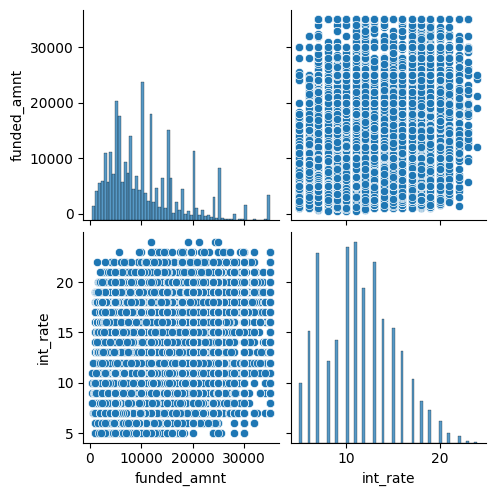

In [74]:
sns.pairplot(loan1[[ 'funded_amnt' , 'int_rate']])
plt.show()

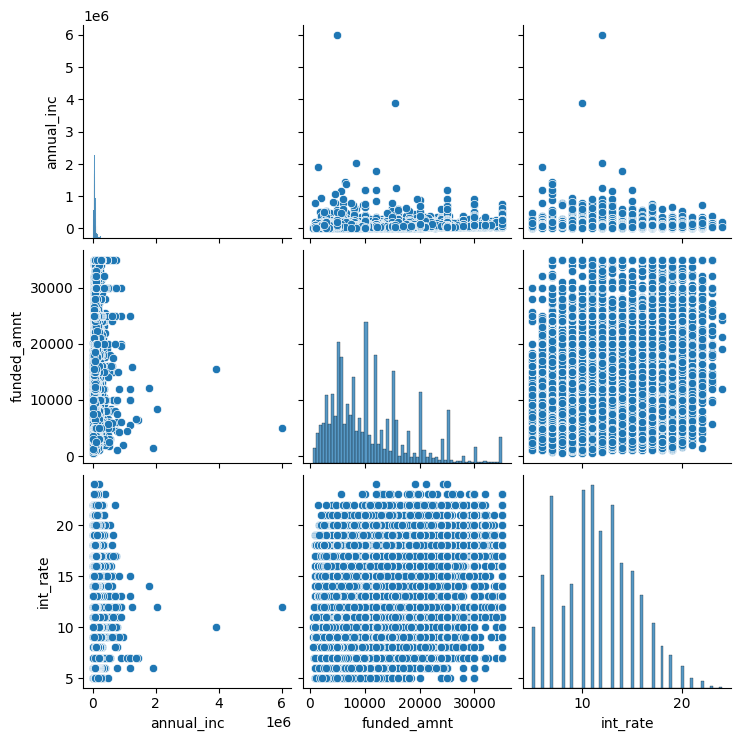

In [78]:
sns.pairplot(loan1[[ 'annual_inc' , 'funded_amnt', 'int_rate']])
plt.show()

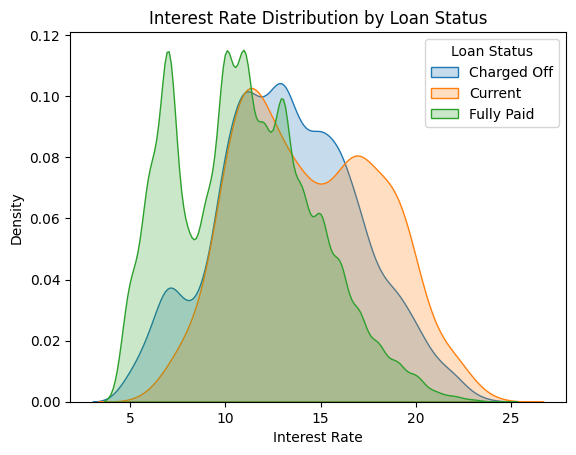

In [85]:
sns.kdeplot(data=loan1[loan1['loan_status'] == 'Charged Off'], x='int_rate', label='Charged Off', fill=True)
sns.kdeplot(data=loan1[loan1['loan_status'] == 'Current'], x='int_rate', label='Current', fill=True)
sns.kdeplot(data=loan1[loan1['loan_status'] == 'Fully Paid'], x='int_rate', label='Fully Paid', fill=True)

# Add labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Interest Rate Distribution by Loan Status')

# Show the legend
plt.legend(title='Loan Status')

# Show the plot
plt.show()


Number of loans per status:
loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

Interest Rate Range for each category:
Fully Paid: 5.0 - 24.0
Charged Off: 5.0 - 24.0
Current: 6.0 - 24.0


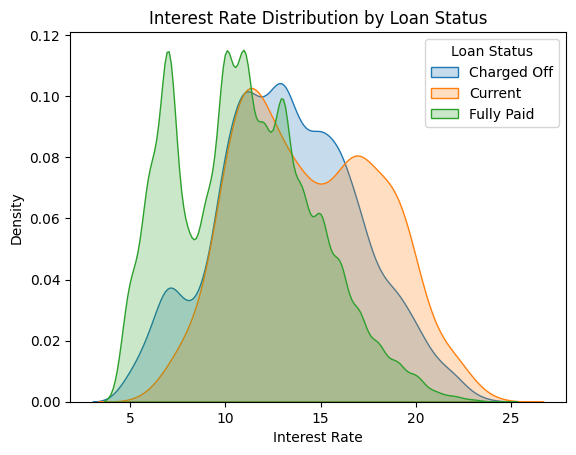

In [86]:
print("Number of loans per status:")
print(loan1['loan_status'].value_counts())

# Calculate and print out the range for each category
print("\nInterest Rate Range for each category:")
for status in loan1['loan_status'].unique():
    min_rate = loan1.loc[loan1['loan_status'] == status, 'int_rate'].min()
    max_rate = loan1.loc[loan1['loan_status'] == status, 'int_rate'].max()
    print(f"{status}: {min_rate} - {max_rate}")

# Create a KDE plot for each loan status
sns.kdeplot(data=loan1[loan1['loan_status'] == 'Charged Off'], x='int_rate', label='Charged Off', fill=True)
sns.kdeplot(data=loan1[loan1['loan_status'] == 'Current'], x='int_rate', label='Current', fill=True)
sns.kdeplot(data=loan1[loan1['loan_status'] == 'Fully Paid'], x='int_rate', label='Fully Paid', fill=True)

# Add labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Interest Rate Distribution by Loan Status')

# Show the legend
plt.legend(title='Loan Status')

# Show the plot
plt.show()